# Discrete & Continuous Distribution

This note will summarize the distribution that we will frequently see when analyzing data.

You can refer to link https://www.datacamp.com/tutorial/probability-distributions-python for example.

Another link that might interest you is this https://www.spcforexcel.com/knowledge/basic-statistics/deciding-which-distribution-fits-your-data-best where the writer mentioned the steps to be taken to determine what kind of distribution that our dataset have. This writing helps me connect the dots for all the statistics knowledge that I have learned in college.

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

### Uniform Distribution
$$ f(x) = \begin{cases} \frac{1}{b-a} & a \le x \le b \\ 0 & x<a, x>b \end{cases}$$

15.062441170614472

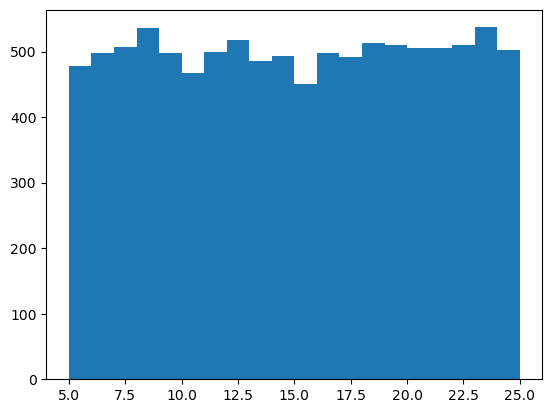

In [3]:
from scipy.stats import uniform

n=10000
start=5
width=20
data = uniform.rvs(size=n, loc=start, scale=width, random_state=12345)

fig, ax = plt.subplots(1,1)
ax.hist(data, bins=20)
data.mean()

Another way we can really claim that the generated data are from the uniform distribution is that from the histogram shown, most of the frequency for each bins are about 500 count. I.e, out of 10000 steps, there are about 500 times where the data generated falls into 1st bin, 2nd bin etc.. Thus, there are 500/10000 chances that the next data generated will fall into one of the bin.
This is the same answer that we'll get if we use the pdf for uniform distribution which is,

$$ f(x) = \frac{1}{b-a} = \frac{1}{25-5} = \frac{1}{20} = \frac{500}{10000} $$

### Normal distribution
$$ f(x) = \frac{1}{\sqrt{2\pi \sigma ^2}} e ^-\frac{(x-\mu)^2}{2\sigma ^2}$$

where $\mu$ is the mean and $\sigma^2$ is the variance

In [12]:
from scipy.stats import norm
data = norm.rvs(size=n,loc=0, scale=2)

-0.013121588293485751

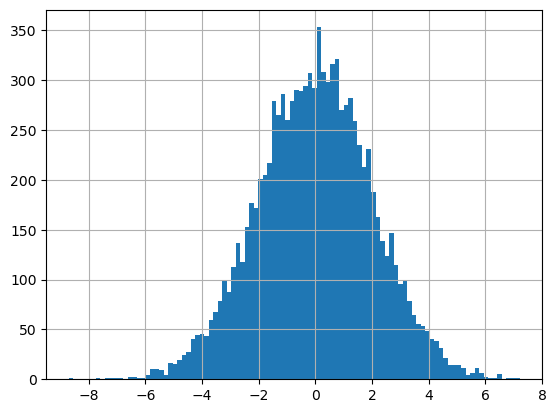

In [43]:
fig, ax = plt.subplots(1,1)
ax.hist(data, bins=100)
plt.grid()
data.mean()

In [19]:
1/np.sqrt(2*np.pi*4)

0.19947114020071635

the above calculation is to calculate the probability that we'll see 0 when we generate the next data point.
$$ f(x) = \frac{1}{\sqrt{2\pi \sigma ^2}} e ^-\frac{(x-\mu)^2}{2\sigma ^2}$$

$$ f(0) = \frac{1}{\sqrt{2\pi*2^2}} e^-\frac{(0-0)^2}{2 * 2^2}$$

$$ f(0) \approx 0.199$$

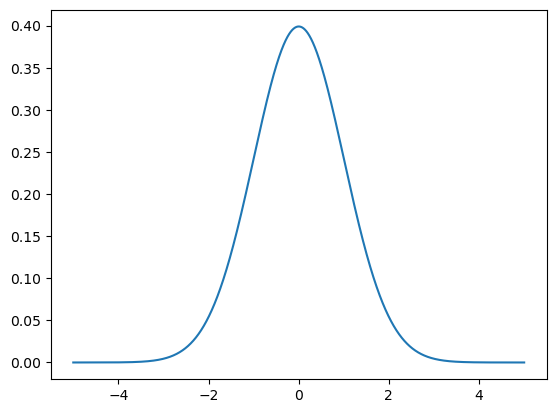

In [4]:
# plot the gaussian pdf
from numpy import arange
from matplotlib import pyplot
from scipy.stats import norm
# define the distribution parameters
sample_space = arange(-5, 5, 0.001)
mean = 0.0
stdev = 1.0
# calculate the pdf
pdf = norm.pdf(sample_space, mean, stdev)
# plot
pyplot.plot(sample_space, pdf)
pyplot.show()

### Student t-distribution

This is a distribution that arises when we try to attempt sampling a normal distribution but with a different sample size (i.e, with student t-distribution, researcher can use small sample size and relate it to the normal distribution of the population)

It has a k, which is number of degreee of freedom that describes the number of information used to describe the population quantity (such as mean, variance)

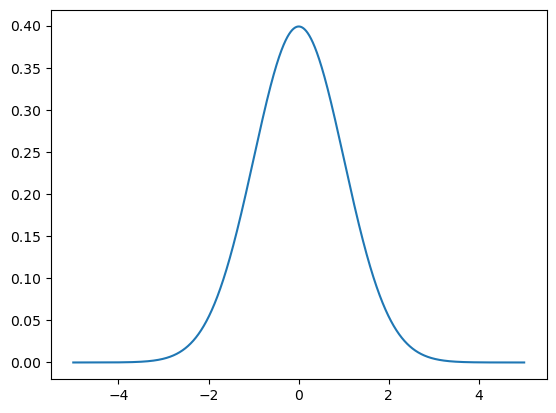

In [3]:
# plot the t-distribution pdf
from numpy import arange
from matplotlib import pyplot
from scipy.stats import t
# define the distribution parameters
sample_space = arange(-5, 5, 0.001)
dof = len(sample_space) - 1
# calculate the pdf
pdf = t.pdf(sample_space, dof)
# plot
pyplot.plot(sample_space, pdf)
pyplot.show()

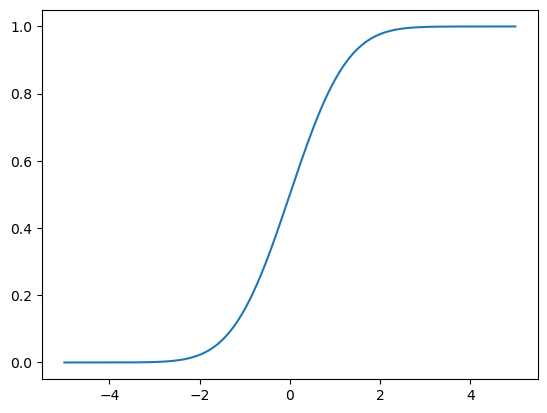

In [2]:
# plot the t-distribution cdf
from numpy import arange
from matplotlib import pyplot
from scipy.stats import t
# define the distribution parameters
sample_space = arange(-5, 5, 0.001)
dof = len(sample_space) - 1
# calculate the cdf
cdf = t.cdf(sample_space, dof)
# plot
pyplot.plot(sample_space, cdf)
pyplot.show()

### Chi-squared distribution

This distribution works similarly as the student's t-distribution in which it is common for researcher to use it as a tool when doing statistical analysis.

No data that would fit in this distribution. The common statistical test used such as test for independence & goodness of fit test (a test to see if our data fit with certain model/distribution).

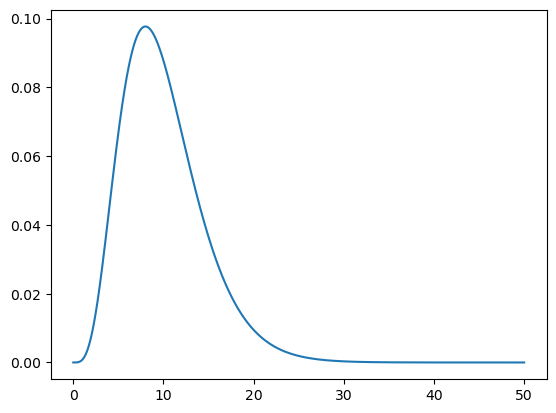

In [11]:
# plot the chi-squared pdf
from numpy import arange
from matplotlib import pyplot
from scipy.stats import chi2
# define the distribution parameters
sample_space = arange(0, 50, 0.01)
dof = 10
# calculate the pdf
pdf = chi2.pdf(sample_space, dof)
# plot
pyplot.plot(sample_space, pdf)
pyplot.show()

As we can see, the chi-squared distribution is not symmetric but as the degrees of freedom increases, the curve will look similar to the normal distribution.

### Gamma distribution

The gamma distribution is another widely used distribution. Its importance is largely due to its relation to exponential and normal distributions.

We'll use scipy.integrate to compute the integration function

The gamma function is 

$$ \Gamma (\alpha) = \ \int_{0}^{\infty} x^{\alpha-1} e ^{-x} \,dx \$$

Text(0, 0.5, '$ \\Gamma (\\alpha) $')

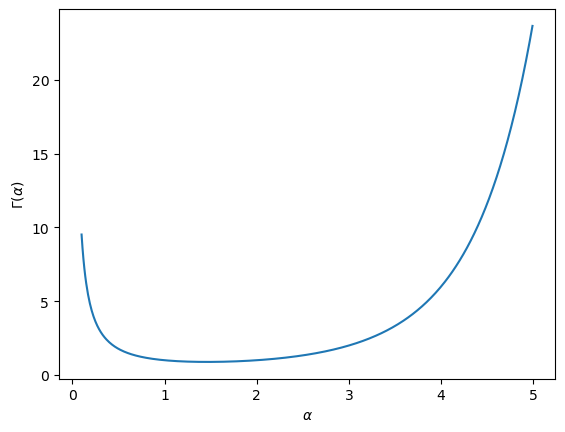

In [7]:
import numpy as np 
import math as m 
import matplotlib.pyplot as plt
from math import exp
from scipy import *
import scipy.integrate

alpha = np.arange(0.1,5,0.01)
oInt = []
for a in alpha:
    def f(x,a):
        return (x**(a-1))*exp(-x)
    y, err = scipy.integrate.quad(f, 0, np.inf, args=a)
    oInt.append(y)

fig, ax = plt.subplots(1,1)
ax = plt.plot(alpha, oInt)
fig.gca().set_xlabel(r'$ \alpha $')
fig.gca().set_ylabel(r'$ \Gamma (\alpha) $')

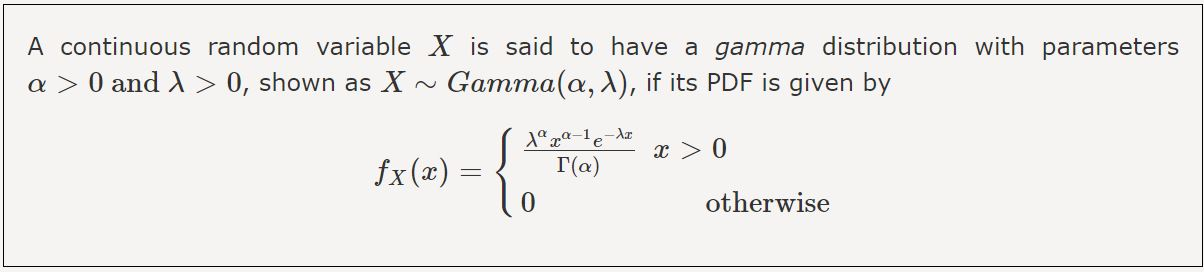

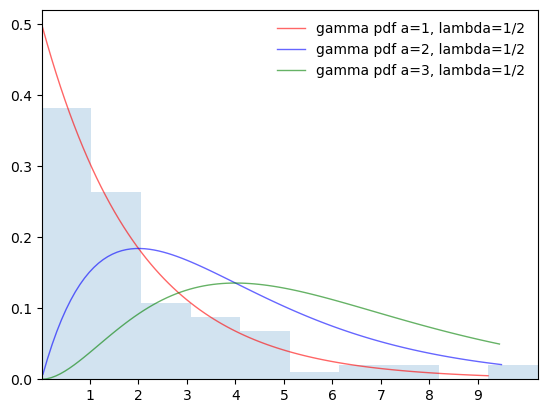

In [74]:
from scipy.stats import gamma
import matplotlib.pyplot as plt

a=1
oScale = 2

r=gamma.rvs(a, scale=oScale, size=100)

fig, ax = plt.subplots(1, 1)

x = np.linspace(gamma.ppf(0.01,a,scale=oScale),gamma.ppf(0.99,a,scale=oScale),100)
y = np.linspace(gamma.ppf(0.0001,2,scale=oScale),gamma.ppf(0.95,2,scale=oScale),100)
z = np.linspace(gamma.ppf(0.00000001,3,scale=oScale),gamma.ppf(0.85,3,scale=oScale),100)

ax.plot(x, gamma.pdf(x,a, scale=oScale),
       'r-', lw=1, alpha=0.6, label='gamma pdf a=1, lambda=1/2')

ax.plot(y, gamma.pdf(y,2, scale=oScale),
       'b-', lw=1, alpha=0.6, label='gamma pdf a=2, lambda=1/2')

ax.plot(z, gamma.pdf(z,3, scale=oScale),
       'g-', lw=1, alpha=0.6, label='gamma pdf a=3, lambda=1/2')

ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)
plt.xticks(np.arange(0,10,1))
ax.legend(loc='best', frameon=False)
ax.margins(x=0)
plt.show()

Gamma distributions is a generalization of exponential distribution. Analysts frequently use this to model the probability for the time taken of independent events occurence (e.g. probability of time until the 4th or 5th failure). 

Note the difference between gamma and exponential distribution is that the exponential is used to model the time of the 1st occurence.

# Beta distribution
Beta distribution is a continuous probability distribution defined by two parameters. This distribution is used to represent the outcomes of proportions or percentage. The most common use of this distribution is to model the uncertainty about the probability of success of a random experiment. Analysts commonly use it to model the time to complete a task. The Beta distribution is the conjugate prior for the Bernoulli, binomial, negative binomial and geometric distributions (seems like those are the distributions that involve success & failure) in Bayesian inference. Computing a posterior using a conjugate prior is very convenient, because you can avoid expensive numerical computation involved in Bayesian Inference.

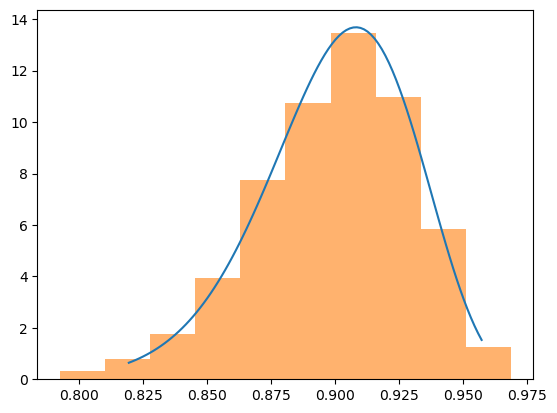

In [9]:
from scipy.stats import beta
import matplotlib.pyplot as plt
import numpy as np

a, b = 90, 10
x = np.linspace(beta.ppf(0.01,a, b), beta.ppf(0.99,a,b), 100)
rv = beta.rvs(a,b,size=1000)

fig, ax = plt.subplots(1,1)
ax.plot(x, beta.pdf(x,a,b), label='beta pdf')
ax.hist(rv, density=True, alpha=0.6)
plt.show()